In [1]:
#Import basic python packages for data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines
import pylab as plot
import matplotlib
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points
import random
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import time

### Import Sklearn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet




### Import Scipy stats packages
from scipy.stats import pearsonr
from scipy.stats import boxcox


# Import statsmodel packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


#Sequential Feature Selector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



import re


import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'whitegrid')
sns.set_palette('bright')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# BC Dataset

In [2]:
BC_facility = pd.read_csv("Data/Combined_BC_Dist.csv")

In [5]:
BC_facility.head()

,BC Value,10452611-Manufacturing-low_dist,10452911-Retail-Res-high_dist,10453011-WWTP-medium_dist,10457011-Manufacturing-medium_dist,10457411-Manufacturing-high_dist,10457511-Manufacturing-high_dist,10457611-Manufacturing-high_dist,10457711-Foundaries-high_dist,10457911-ConcretePlant-medium_dist,10460411-Retail-Res-medium_dist,10460511-Retail-Res-high_dist,10461011-Retail-Res-low_dist,10461711-Retail-Res-medium_dist,10461911-Waste-medium_dist,10462111-Retail-Res-low_dist,10466511-FoodPlant-high_dist,10469511-Retail-Res-high_dist,10470711-Retail-Res-medium_dist,10471211-Retail-Res-low_dist,10472111-Retail-Res-low_dist,10472311-Retail-Res-medium_dist,10472411-Retail-Res-low_dist,10472611-EGen-high_dist,10473411-Retail-Res-low_dist,10473611-Manufacturing-medium_dist,10476211-Retail-Res-medium_dist,10476711-Manufacturing-high_dist,10476911-Transportation-medium_dist,10477111-Transportation-low_dist,10477311-Retail-Res-medium_dist,10477411-Waste-high_dist,10478111-Retail-Res-medium_dist,10478611-Retail-Res-low_dist,10478711-Retail-Res-medium_dist,10478811-Retail-Res-low_dist,10481011-Transportation-low_dist,10487211-Retail-Res-medium_dist,10488111-Retail-Res-medium_dist,10490111-Transportation-medium_dist,10490611-Retail-Res-low_dist,10492211-Retail-Res-low_dist,10492711-Manufacturing-medium_dist,10493211-Retail-Res-medium_dist,10494711-Manufacturing-medium_dist,10495311-Manufacturing-medium_dist,10496311-Retail-Res-medium_dist,10496511-Retail-Res-medium_dist,10496711-Retail-Res-medium_dist,10497111-Retail-Res-medium_dist,10497711-Retail-Res-medium_dist,10498611-Transportation-medium_dist,10500811-Retail-Res-low_dist,10501811-Retail-Res-medium_dist,10501911-Retail-Res-low_dist,10502011-Retail-Res-low_dist,10502111-Retail-Res-medium_dist,10502511-Retail-Res-low_dist,10502611-Retail-Res-low_dist,10502711-Retail-Res-medium_dist,10503011-Retail-Res-medium_dist,10504811-Retail-Res-low_dist,10505411-Manufacturing-medium_dist,10506911-Retail-Res-medium_dist,10507111-Manufacturing-medium_dist,10510811-AsphaltPlant-high_dist,10517111-Retail-Res-high_dist,10518411-FoodPlant-low_dist,10518911-ConcretePlant-high_dist,10523411-Manufacturing-high_dist,10707511-EGen-high_dist,10708011-Waste-high_dist,10708111-Manufacturing-high_dist,1088911-Retail-Res-medium_dist,1105111-ConcretePlant-high_dist,1106211-Retail-Res-high_dist,1106311-Retail-Res-low_dist,1106511-Retail-Res-medium_dist,1107511-Retail-Res-medium_dist,11650611-Transportation-medium_dist,126911-Retail-Res-medium_dist,127111-Retail-Res-medium_dist,127511-Retail-Res-medium_dist,127611-Retail-Res-medium_dist,127711-Retail-Res-medium_dist,127811-Retail-Res-medium_dist,128211-Retail-Res-medium_dist,130511-Retail-Res-medium_dist,136511-EGen-high_dist,137211-Retail-Res-high_dist,13747011-Transportation-medium_dist,13747911-Retail-Res-low_dist,13748111-Retail-Res-medium_dist,13750711-Retail-Res-high_dist,13760711-Retail-Res-medium_dist,13760911-Retail-Res-high_dist,13761011-Retail-Res-high_dist,13761511-Transportation-medium_dist,13777411-Transportation-medium_dist,13777611-Retail-Res-medium_dist,13777911-Retail-Res-low_dist,13779311-Retail-Res-low_dist,13782611-Retail-Res-medium_dist,13783011-Retail-Res-low_dist,13785311-Retail-Res-medium_dist,13787211-Transportation-medium_dist,13787311-Retail-Res-medium_dist,13799311-Retail-Res-medium_dist,13799411-Retail-Res-low_dist,13801611-Manufacturing-high_dist,13812811-Retail-Res-low_dist,13815311-Transportation-low_dist,13818011-Transportation-medium_dist,13818411-Retail-Res-low_dist,13818811-Retail-Res-low_dist,13818911-Retail-Res-medium_dist,13825511-Retail-Res-medium_dist,13833111-Retail-Res-medium_dist,13833411-Retail-Res-low_dist,13837411-Transportation-low_dist,138911-AutoRepair-high_dist,139211-Retail-Res-medium_dist,13980511-Retail-Res-medium_dist,13983311-Manufacturing-medium_dist,13985611-Misc-medium_dist,140211-Manufacturing-high_dist,14059411-Retail-Res-medium_dist,14059511-Retail-Res-low_dist,14071311-Retail-Res-low_dist,14071611-Manufact

In [4]:
BC_facility.drop(BC_facility.columns[BC_facility.columns.str.contains('_latitude')], axis=1, inplace=True)
BC_facility.drop(BC_facility.columns[BC_facility.columns.str.contains('_longitude')], axis=1, inplace=True)
BC_facility.drop(BC_facility.columns[BC_facility.columns.str.contains('_emsdist')], axis=1, inplace=True)
BC_facility.drop(BC_facility.columns[BC_facility.columns.str.contains('_PM25')], axis=1, inplace=True)
BC_facility.drop(BC_facility.columns[BC_facility.columns.str.contains('Latitude')], axis=1, inplace=True)
BC_facility.drop(BC_facility.columns[BC_facility.columns.str.contains('Longitude')], axis=1, inplace=True)
BC_facility.drop(BC_facility.columns[BC_facility.columns.str.contains('Unnamed: 0')], axis=1, inplace=True)

# Random Forest BC dataset

In [6]:
y_BC = BC_facility[['BC Value']]
X_BC = BC_facility.drop(columns = 'BC Value')

In [7]:
## Test Train split 
X_BC_train, X_BC_test, y_BC_train, y_BC_test = train_test_split(X_BC, y_BC, test_size = 0.3, random_state = 0)  

In [8]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 4)
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')
count = 1


feature_names = ['{}'.format(name) for name in X_BC.columns]

BC_feature_importance_df = pd.DataFrame({'feature': [], 'importance': [], 'fold': []})

for train, _ in kf.split(X_BC, y_BC):
    RFRegressor.fit(X_BC.iloc[train,:], y_BC.iloc[train])
    BC_featureimp_index = np.argsort(RFRegressor.feature_importances_)[::-1]
    BC_labels = [feature_names[-i] for i in BC_featureimp_index]
    
    d = {'feature': BC_labels, 'importance': RFRegressor.feature_importances_[BC_featureimp_index], 'fold': count}
    BC_feature_importance_df = BC_feature_importance_df.append(pd.DataFrame(d))
    count = count + 1
    
#     # plot
#     plt.figure(figsize = (15,15))
#     plt.bar(BC_labels, RFRegressor.feature_importances_[BC_featureimp_index])
#     plt.xticks(BC_labels, rotation='vertical')
#     plt.ylabel('Importance')
#     plt.xlabel('Features')
#     plt.title('Fold {}'.format(count))
#     count = count + 1
# plt.show()


In [9]:
#Reset index and drop the column containin repeating indices
BC_feature_importance_df.reset_index(inplace=True)
BC_feature_importance_df.drop(columns = ['index'], inplace=True)

In [10]:
#Calculate the mean score of all features from cross validation and reset index
BC_feature_importance_df = BC_feature_importance_df.groupby('feature').describe()['importance']
BC_feature_importance_df.reset_index(inplace=True)

In [11]:
BC_feature_importance_df = BC_feature_importance_df.sort_values('mean', ascending = False)

In [12]:
BC_feature_importance_df.head()

,feature,count,mean,std,min,25%,50%,75%,max
89,13747011-Transportation-medium_dist,4.0,0.085335,0.133029,0.002540,0.006722,0.028130,0.106743,0.282539
266,18496311-Misc-medium_dist,4.0,0.064526,0.111891,0.007720,0.008279,0.009012,0.065259,0.232358
206,17246911-Retail-Res-medium_dist,4.0,0.047479,0.079216,0.001073,0.001205,0.011739,0.058014,0.165367
217,17252111-Manufacturing-medium_dist,4.0,0.036757,0.069520,0.000571,0.001357,0.002720,0.038120,0.141017
256,18490811-Retail-Res-medium_dist,4.0,0.036284,0.067803,0.001135,0.002327,0.003010,0.036967,0.137980


In [13]:
def cv_gridsearch_models(model_type, X, y, pol ,pca_apply= False):
    """model_type: string. Inputs = ridge, randomforest, xgboost
    X = dataframe with all features (normalized and scaled)
    y = dataframe of target variable
    pca_apply = set apply_pca = True"""
    
    #Split X and y into 70/30 train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

    #Scale the test and training X - data
    feature_scaler = StandardScaler()
    X_train = feature_scaler.fit_transform(X_train)
    X_test = feature_scaler.transform(X_test)
    
    
    ## Define grid parameters for different types of model and perform a gridsearch CV over each
    ## First model is a simple RandomforestRegressor. Grid parameters are number of estimators, max_features, and max_depth
    ## Second model is a Ridge Regression model. Grid parameters include Alpha and fit_intercept
    ## Third model is a linear regression model with grid parameters like 
    ## Fourth model is XGBoost, with grid parameters like max_depth, learning rate and number of estimators
    
    if model_type == 'RF':
        rf_regressor = RandomForestRegressor(random_state=0, n_jobs = -1, max_features = 'sqrt', n_estimators = 50)
        grid_param = {
            'n_estimators': [300, 400, 500, 600],
            'max_depth': [5,10, 15, 50]
                      }
        model = GridSearchCV(estimator=rf_regressor,
                     param_grid=grid_param,
 #                    scoring='neg_mean_absolute_error',
                     cv=5,
                     n_jobs=-1)
        
    elif model_type == 'Ridge':
        ridge_reg = Ridge()
        grid_param = {
            'alpha': [1,0.1,0.01,0.001, 0, 10],
            'fit_intercept': [True, False], 
            }
        model = GridSearchCV(estimator = ridge_reg,
                            param_grid = grid_param,
                            scoring = 'r2',
                            cv = 5)
        
    elif model_type == "ElasticNet":
        elastic_net = ElasticNet(normalize = True, random_state = 0)
        grid_param = {'l1_ratio': [.1, .5, .7, .9, .95, .99, 1],
                     'alpha': [1,0.1,0.01,0, 10]}
        model = GridSearchCV(estimator = elastic_net,
                            param_grid = grid_param,
                            scoring = 'r2',
                            cv = 5)
        
    elif model_type == "Linear":
        linear_reg = LinearRegression(n_jobs = -1)
        grid_param = {'fit_intercept': [True, False]}
        model = GridSearchCV(estimator =linear_reg, param_grid = grid_param,
                            cv = 5)
        
        
    elif model_type == 'XGB':
        XGB_reg = XGBRegressor(objective = 'reg:linear', random_state = 0, n_estimators = 50)
        grid_param = {
            'max_depth' : [2,4,6,10],
            'n_estimators': [40,60,100],
            'learning_rate': [0.1, 0.001, 0.05, 0.01]
            }
        model = GridSearchCV(estimator = XGB_reg,
                            param_grid = grid_param,
 #                           scoring = 'neg_mean_squared_error', 
                             cv = 5)
   
    if (model_type == 'Ridge') & (pca_apply == 'True'):
            pca = PCA(n_components = np.argwhere(np.cumsum(pca.explained_variance_ratio_) > 0.999)[0][0])
            X_train_pca = pca.fit_transform(X_train)
            X_test_pca = pca.transform(X_test)
            model.fit(X_train_pca, y_train)
            train_score= model.score(X_train_pca, y_train)
            test_score = model.score(X_test_pca, y_test)
            print("Train R2 = {}, Test_R2 = {}".format(train_score, test_score))
            best_parameters = model.best_params_
            print("Best parameter for {} is {}".format(model_type, best_parameters))
            best_result = model.best_score_
            print("Best R2 achieved for {} is {}".format(model_type, best_result))
            
    else: 
        model.fit(X_train, y_train)
        y_pred = []
        y_pred = model.predict(X_test)
        # model.predict returns nparray of nparray objects
        if (model_type == "Ridge") or (model_type == "Linear"):
            y_pred = [y[0] for y in y_pred]            
        best_parameters = model.best_params_
        print("Best parameter for {} is {}".format(model_type, best_parameters))
        best_result = model.best_score_
        print("Best accuracy achieved for {} is {}".format(model_type, best_result))
        train_score= model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        print("Train R2 = {}, Test_R2 = {}".format(train_score, test_score))
        best_parameters = model.best_params_
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean Squared Error: {}".format(rmse))
        

        ##Plot a graph of predicted vs actual values
        #sns.set_style("darkgrid")
        #sns.set(font_scale = 1.2)
        plt.figure(figsize = (8,6))
        ax = sns.regplot(x = y_test, y = y_pred, fit_reg=True)
        if pol=='BC':
            ax.set(xlabel = 'Actual BC Concentrations (ug/m3)', ylabel = 'Predicted BC Concetrations (ug/m3)') 
        else:
            ax.set(xlabel = 'Actual NO2 Concentrations (ppb)', ylabel = 'Predicted NO2 Concetrations (ppb)')
   
        plt.title("Predicted vs. Actual concentration for "+model_type+ " Regression for "+pol)
        if pol=='BC':
            plt.text(6 , 0 ,"R2 = {}".format(round(test_score,3)), fontsize = 18)
        else:
            plt.text(45 , 10 ,"R2 = {}".format(round(test_score,3)), fontsize = 18)
        
        
            
            
        
        

Random Forest Regression:
Best parameter for RF is {'max_depth': 15, 'n_estimators': 600}
Best accuracy achieved for RF is 0.8093475395362308
Train R2 = 0.9259881428141906, Test_R2 = 0.7948185326613213
Root Mean Squared Error: 0.280018512609505


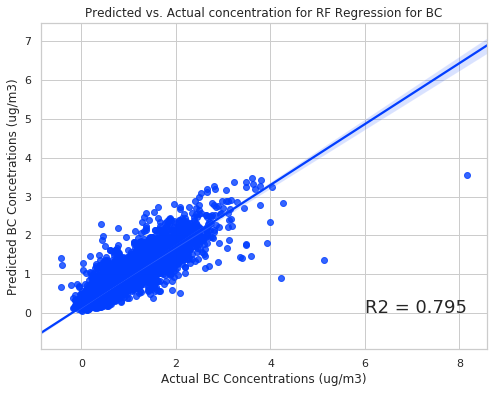

In [23]:
print("Random Forest Regression:")

cv_gridsearch_models('RF', X_BC, y_BC, "BC", True)

In [21]:
print("XGBoost Regression:")
cv_gridsearch_models('XGB', X_BC, y_BC, "BC", True)

XGBoost Regression:


KeyboardInterrupt: 

# NO2 Dataset

In [14]:
NO2_facility = pd.read_csv("Data/Combined_NO2_Dist.csv")

In [15]:
NO2_facility.drop(NO2_facility.columns[NO2_facility.columns.str.contains('_latitude')], axis=1, inplace=True)
NO2_facility.drop(NO2_facility.columns[NO2_facility.columns.str.contains('_longitude')], axis=1, inplace=True)
NO2_facility.drop(NO2_facility.columns[NO2_facility.columns.str.contains('_emsdist')], axis=1, inplace=True)
NO2_facility.drop(NO2_facility.columns[NO2_facility.columns.str.contains('_PM25')], axis=1, inplace=True)
NO2_facility.drop(NO2_facility.columns[NO2_facility.columns.str.contains('Latitude')], axis=1, inplace=True)
NO2_facility.drop(NO2_facility.columns[NO2_facility.columns.str.contains('Longitude')], axis=1, inplace=True)
NO2_facility.drop(NO2_facility.columns[NO2_facility.columns.str.contains('Unnamed: 0')], axis=1, inplace=True)


# Random Forest NO2 dataset

In [16]:
y_NO2 = NO2_facility[['NO2 Value']]
X_NO2 = NO2_facility.drop(columns = 'NO2 Value')

In [17]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 4)
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')
count = 1


feature_names = ['{}'.format(name) for name in X_NO2.columns]

NO2_feature_importance_df = pd.DataFrame({'feature': [], 'importance': [], 'fold': []})

for train, _ in kf.split(X_NO2, y_NO2):
    RFRegressor.fit(X_NO2.iloc[train,:], y_NO2.iloc[train])
    NO2_featureimp_index = np.argsort(RFRegressor.feature_importances_)[::-1]
    NO2_labels = [feature_names[-i] for i in NO2_featureimp_index]
    
    d = {'feature': NO2_labels, 'importance': RFRegressor.feature_importances_[NO2_featureimp_index], 'fold': count}
    NO2_feature_importance_df = NO2_feature_importance_df.append(pd.DataFrame(d))
    count = count + 1
    
#     # plot
#     plt.figure(figsize = (15,15))
#     plt.bar(BC_labels, RFRegressor.feature_importances_[BC_featureimp_index])
#     plt.xticks(BC_labels, rotation='vertical')
#     plt.ylabel('Importance')
#     plt.xlabel('Features')
#     plt.title('Fold {}'.format(count))
#     count = count + 1
# plt.show()


In [18]:
#Reset index and drop the column containin repeating indices
NO2_feature_importance_df.reset_index(inplace=True)
NO2_feature_importance_df.drop(columns = ['index'], inplace=True)

In [19]:
#Calculate the mean score of all features from cross validation and reset index
NO2_feature_importance_df = NO2_feature_importance_df.groupby('feature').describe()['importance']
NO2_feature_importance_df.reset_index(inplace=True)

In [20]:
NO2_feature_importance_df = NO2_feature_importance_df.sort_values('mean', ascending = False)

In [21]:
NO2_feature_importance_df.head()

,feature,count,mean,std,min,25%,50%,75%,max
391,17249711-Retail-Res-low_dist,4.0,0.117594,0.215811,0.001716,0.008254,0.013744,0.123084,0.441174
151,137211-Retail-Res-high_dist,4.0,0.112395,0.219830,0.001846,0.002130,0.002797,0.113062,0.442138
279,14314611-Retail-Res-medium_dist,4.0,0.079826,0.155683,0.000996,0.001748,0.002481,0.080559,0.313347
475,18490711-Retail-Res-medium_dist,4.0,0.047086,0.090340,0.001388,0.001631,0.002181,0.047636,0.182594
281,14314811-Transportation-medium_dist,4.0,0.039003,0.070022,0.000954,0.003312,0.005544,0.041236,0.143970


Random Forest Regression:
Best parameter for RF is {'max_depth': 50, 'n_estimators': 600}
Best accuracy achieved for RF is 0.9060147373696212
Train R2 = 0.9877413588322413, Test_R2 = 0.9128618531388566
Root Mean Squared Error: 2.897053509227024


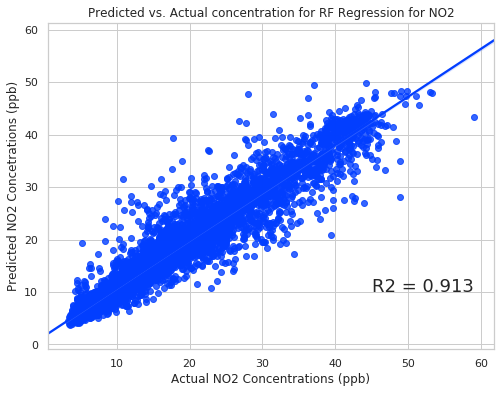

In [22]:
print("Random Forest Regression:")

cv_gridsearch_models('RF', X_NO2, y_NO2, "NO2", True)